In [47]:
import numpy as np
#import nltk
import unicodedata
from collections import Counter
import matplotlib.pylab as plt
import pandas as pd

In [48]:
#Abrir y leer texto
file = open('./Textos/España_textos.txt', 'r')
texto = file.read()

In [49]:
#Cambio a minúscula
texto = texto.lower()

In [50]:
#Diccionario fonemización simple sin tilde
ori1 = ['qu','v','x','z','ch','h','ce','ci','c','j','ge','gi','gue','gui','y ','y,','y.','ll',' r','rr','sr','nr','lr']
new1 = ['k','b','ks','s','v','','se','si','k','x','xe','xi','ge','gi','i ','i,','i.','y',' q','q','sq','nq','lq']

In [51]:
#Diccionario fonemización simple con tilde
ori2 = ['qu','v','x','z','ch','h','ce','ci','cí','c','j','ge','gi','gí','gue','gui','guí','y ','y,','y.','ll',' r','rr','sr','nr','lr']
new2 = ['k','b','ks','s','v','','se','si','sí','k','x','xe','xi','xí','ge','gi','gí','i ','i,','i.','y',' q','q','sq','nq','lq']

In [52]:
#Reemplazo fonemización simple sin tilde
texto_ps = texto
texto_ps2 = texto
for i in range(0,len(ori1)):
    texto_ps = texto_ps.replace(ori1[i],new1[i])

for j in range(0,len(ori2)):
    texto_ps2 = texto_ps2.replace(ori2[j],new2[j])

In [53]:
#Puntuación a quitar
import string
punctuation = string.punctuation+'¡'+'"'+'¿'+'—'+'“'+'-'+'”'+'º'+'¿'+'—'+'“'+'-'+'”'+'¡'+'1'+'2'+'5'+'6'+'7'+'8'+'0'+'º'+'9'+'4'+'3'+'«'+'»'+'.'+'–'+'’'+'...'+'\n'+'ô'+'è'+'…'+''+'ü'+'ñ'

In [55]:
#Quito puntuación
for p in punctuation:
    texto = texto.replace(p,'')
    texto_ps = texto_ps.replace(p,'')
    texto_ps2 = texto_ps.replace(p,'')

In [57]:
#"Quito espacios en blancos"
texto = texto.replace(' ','')
texto_ps = texto_ps.replace(' ','')
texto_ps2 = texto_ps.replace(' ','')

In [59]:
#Defino diacriticas y otras letras especiales ü->% y ñ->#
diacriticas = ['í','ú','á','é','ó']
normal = ['i','u','a','e','o']

In [60]:
#Quito todas las diacriticas para fig 1 a 4
texto_i = texto_ps
texto_i2 = texto_ps2
for diac in range(0,len(diacriticas)):
    texto = texto.replace(diacriticas[diac],normal[diac])
    texto_ps = texto_ps.replace(diacriticas[diac],normal[diac])
    texto_ps2 = texto_ps2.replace(diacriticas[diac],normal[diac])

In [63]:
#Texto para figura 3
phone_w1 = {'ua':'wa','au':'aw','eu':'ew','ue':'we','iu':'iw','ui':'wi','uo':'wo','ou':'ow'}
texto_w = texto_ps
texto_w2 = texto_ps2
for key in phone_w1.keys():
    texto_w = texto_w.replace(key,phone_w1[key])
for key in phone_w1.keys():
    texto_w2 = texto_w2.replace(key,phone_w1[key])

In [64]:
#Texto para figura 4
phone_j = {'ia':'ja','ai':'aj','ei':'ej','ie':'je','io':'jo','oi':'oj','iu':'ju','ui':'uj'}
phone_w2 = {'ua':'wa','au':'aw','eu':'ew','ue':'we','uo':'wo','ou':'ow','ju':'jw','uj':'wj'}
texto_i1 = texto_ps
texto_i1_2 = texto_ps2
for key in phone_j.keys():
    texto_i1 = texto_i1.replace(key,phone_j[key])
for key in phone_w2.keys():
    texto_i1 = texto_i1.replace(key,phone_w2[key])
for key in phone_j.keys():
    texto_i1_2 = texto_i1_2.replace(key,phone_j[key])
for key in phone_w2.keys():
    texto_i1_2 = texto_i1_2.replace(key,phone_w2[key])

In [65]:
#Texto para figura 5
phone_w3 = {'ua':'wa','au':'aw','eu':'ew','ue':'we','uo':'wo','ou':'ow','ju':'jw','uj':'wj','ui':'wi','iu':'iw'}
for key in phone_j.keys():
    texto_i = texto_i.replace(key,phone_j[key])
for diac in range(0,len(diacriticas)):
    texto_i = texto_i.replace(diacriticas[diac],normal[diac])
for key in phone_w3.keys():
    texto_i = texto_i.replace(key,phone_w3[key])
    
for key in phone_j.keys():
    texto_i2 = texto_i2.replace(key,phone_j[key])
for diac in range(0,len(diacriticas)):
    texto_i2 = texto_i2.replace(diacriticas[diac],normal[diac])
for key in phone_w3.keys():
    texto_i2 = texto_i2.replace(key,phone_w3[key])

In [66]:
#Función para Gráfica y Datos fig.1  Letras como fonemas
def Grafica_Datos_1(text):
    Contador = Counter(text)
    Data = pd.DataFrame.from_dict(Contador, orient='index', columns = ['Frecuencia'])
    Data['Fraccional'] = Data['Frecuencia']/sum(Data['Frecuencia'])
    Data = Data.sort_values(by = 'Fraccional', ascending = False)
    fig = plt.figure(figsize = (10,8))
    plt.plot(Data['Fraccional'], 'mo')
    plt.show()
    return fig, Data

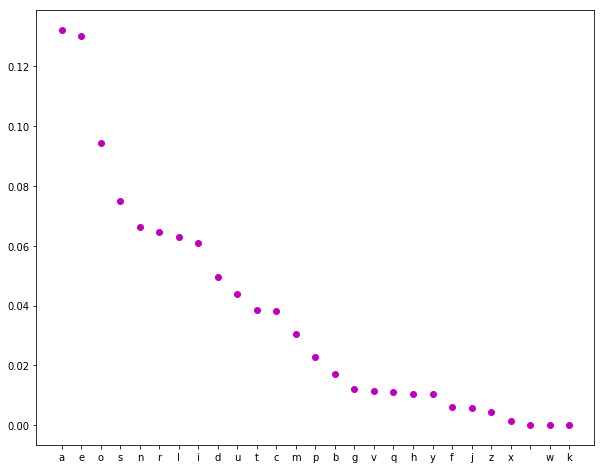

In [67]:
f1, data1 = Grafica_Datos_1(texto)

In [68]:
data1

,Frecuencia,Fraccional
a,25133,0.132315
e,24759,0.130346
o,17938,0.094436
s,14252,0.075031
n,12593,0.066297
r,12299,0.064749
l,11933,0.062822
i,11597,0.061054
d,9431,0.049650
u,8310,0.043749


In [69]:
#Función para Gráfica y Datos fig.2 Fonemizacion simple
def Grafica_Datos_2(text_ps):
    Contador = Counter(text_ps)
    Data = pd.DataFrame.from_dict(Contador, orient='index', columns = ['Frecuencia'])
    Data['Fraccional'] = Data['Frecuencia']/sum(Data['Frecuencia'])
    Data = Data.sort_values(by = 'Fraccional', ascending = False)
    fig = plt.figure(figsize = (10,8))
    plt.plot(Data['Fraccional'], 'mo')
    plt.show()
    return fig, Data

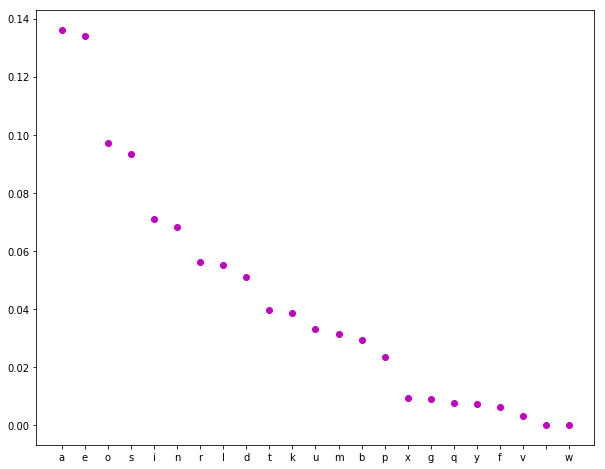

In [70]:
f2, data2 = Grafica_Datos_2(texto_ps2)

In [71]:
#Función para Gráfica y Datos fig.3 Fonemas /w/ y /u/
def Grafica_Datos_3(text_w):
    Contador = Counter(text_w)
    Data = pd.DataFrame.from_dict(Contador, orient='index', columns = ['Frecuencia'])
    Data['Fraccional'] = Data['Frecuencia']/sum(Data['Frecuencia'])
    Data = Data.sort_values(by = 'Fraccional', ascending = False)
    fig = plt.figure(figsize = (10,8))
    plt.plot(Data['Fraccional'], 'mo')
    plt.show()
    return fig, Data

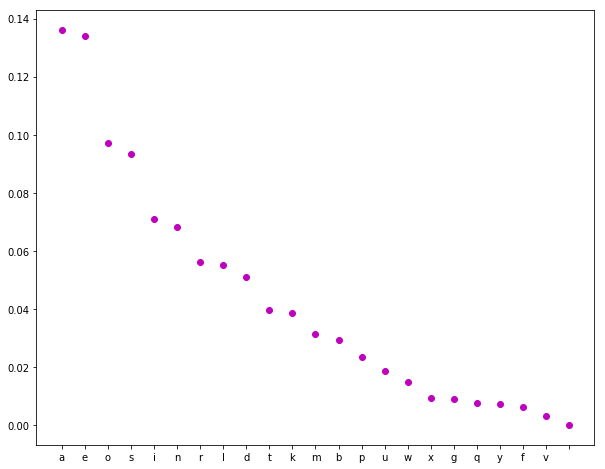

In [72]:
f3, data3 = Grafica_Datos_3(texto_w)

In [73]:
data3

,Frecuencia,Fraccional
a,25133,0.136180
e,24759,0.134154
o,17938,0.097195
s,17225,0.093332
i,13128,0.071132
n,12593,0.068234
r,10341,0.056031
l,10151,0.055002
d,9431,0.051101
t,7312,0.039619


In [74]:
#Función para Gráfica y Datos fig.4 Fonemas /w/ y /u/ & /i/ y /j/
def Grafica_Datos_4(text_i1):
    Contador = Counter(text_i1)
    Data = pd.DataFrame.from_dict(Contador, orient='index', columns = ['Frecuencia'])
    Data['Fraccional'] = Data['Frecuencia']/sum(Data['Frecuencia'])
    Data = Data.sort_values(by = 'Fraccional', ascending = False)
    fig = plt.figure(figsize = (10,8))
    plt.plot(Data['Fraccional'], 'mo')
    plt.show()
    return fig, Data

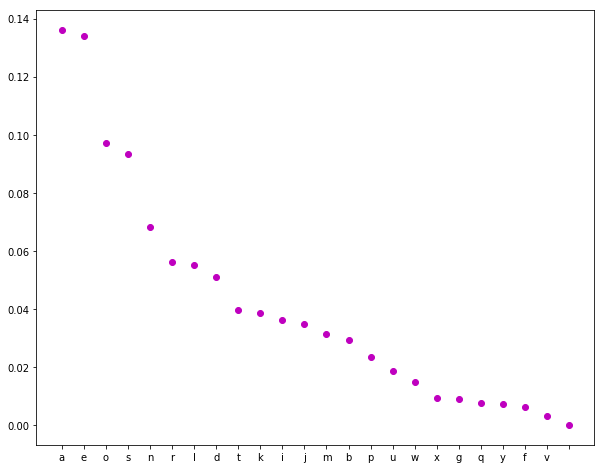

In [75]:
f4, data4 = Grafica_Datos_4(texto_i1)

In [76]:
data4

,Frecuencia,Fraccional
a,25133,0.136180
e,24759,0.134154
o,17938,0.097195
s,17225,0.093332
n,12593,0.068234
r,10341,0.056031
l,10151,0.055002
d,9431,0.051101
t,7312,0.039619
k,7113,0.038541


In [77]:
#Función para Gráfica y Datos fig.5 Fonemas /w/ y /u/ & /i/ y /j/ tomando encuenta diacríticas
def Grafica_Datos_5(text_i):
    Contador = Counter(text_i)
    Data = pd.DataFrame.from_dict(Contador, orient='index', columns = ['Frecuencia'])
    Data['Fraccional'] = Data['Frecuencia']/sum(Data['Frecuencia'])
    Data = Data.sort_values(by = 'Fraccional', ascending = False)
    fig = plt.figure(figsize = (10,8))
    plt.plot(Data['Fraccional'], 'mo')
    plt.show()
    return fig, Data

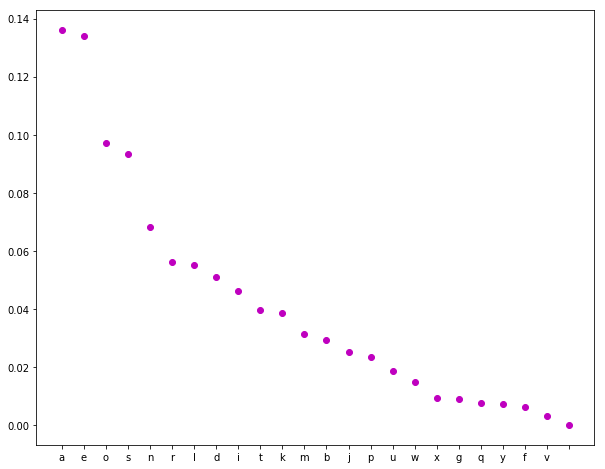

In [79]:
f5, data5 = Grafica_Datos_5(texto_i2)

In [80]:
data5

,Frecuencia,Fraccional
a,25133,0.136180
e,24759,0.134154
o,17938,0.097195
s,17225,0.093332
n,12593,0.068234
r,10341,0.056031
l,10151,0.055002
d,9431,0.051101
i,8501,0.046062
t,7312,0.039619
